# **Induced Pairing**

In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

from MTI_Second_Order import FMTI2_NeumannBC

# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors_real = ['brown', 'red', 'orange', 'gold']
# colors for plotting
colors_imag = ['blue','dodgerblue','lightskyblue','cyan']
# colors for plotting
colors_abs = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]


# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=z, Z=z, z0=0, kx=0.001, ky=0.002, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])
print(F2.shape)

(250, 4, 4)


### Check on Antisymmetry

In order to satisy the Pauli principle, the anomalous Green's fucntion must satisfy the following antisymmetry relation:
$$
    \mathcal{F}^{\dagger}_{\alpha\beta}(k_x,k_y; z,z';\omega) = - \mathcal{F}^{\dagger}_{\beta\alpha}(-k_x,-k_y; z',z;-\omega) \,.
$$

In [2]:
z1 = 8; z2 = 59; kx = -0.0094; ky = 0.058; w = 0.003

f = FMTI2_NeumannBC(d=d, z=z1, Z=z2, z0=0., kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=w, Gamma=Gamma)
print(f)
print()

finv = FMTI2_NeumannBC(d=d, z=z2, Z=z1, z0=0., kx=-kx, ky=-ky, L=L, mu=mu, Delta=Delta, omega=-w, Gamma=Gamma)
print(-finv)
print()

div = np.divide( f, np.transpose(finv) )
add = np.add( f, np.transpose(finv) ); add[np.abs(add) < 1E-6] = 0

print(add)

[[ 3.67171171e-04-2.65817435e-04j  2.16170485e-04-2.44326560e-04j
  -2.65070695e-04-8.77478274e-05j -8.80029608e-05+1.48149033e-04j]
 [ 2.40453492e-04+2.98040746e-04j  2.67134574e-04+2.37887608e-04j
  -4.30477362e-05-1.42584998e-04j -2.88745982e-04+2.79969171e-05j]
 [ 2.10365331e-04+2.98042470e-04j  4.76336817e-05+2.45145837e-04j
  -4.20601792e-05-4.47300834e-04j -2.30756422e-04-4.14422069e-04j]
 [ 1.16129075e-04-3.57837613e-04j  1.76978174e-04-2.01670503e-04j
  -3.25693697e-04+3.17193888e-04j -1.76708387e-04+4.58276914e-04j]]

[[ 3.67171171e-04-2.65817435e-04j  2.40453492e-04+2.98040746e-04j
   2.10365331e-04+2.98042470e-04j  1.16129075e-04-3.57837613e-04j]
 [ 2.16170485e-04-2.44326560e-04j  2.67134574e-04+2.37887608e-04j
   4.76336817e-05+2.45145837e-04j  1.76978174e-04-2.01670503e-04j]
 [-2.65070695e-04-8.77478274e-05j -4.30477362e-05-1.42584998e-04j
  -4.20601792e-05-4.47300834e-04j -3.25693697e-04+3.17193888e-04j]
 [-8.80029608e-05+1.48149033e-04j -2.88745982e-04+2.79969171e-05j
 

## Spatial Dependence

#### <font color='green'> **Absolute Value** </font> 

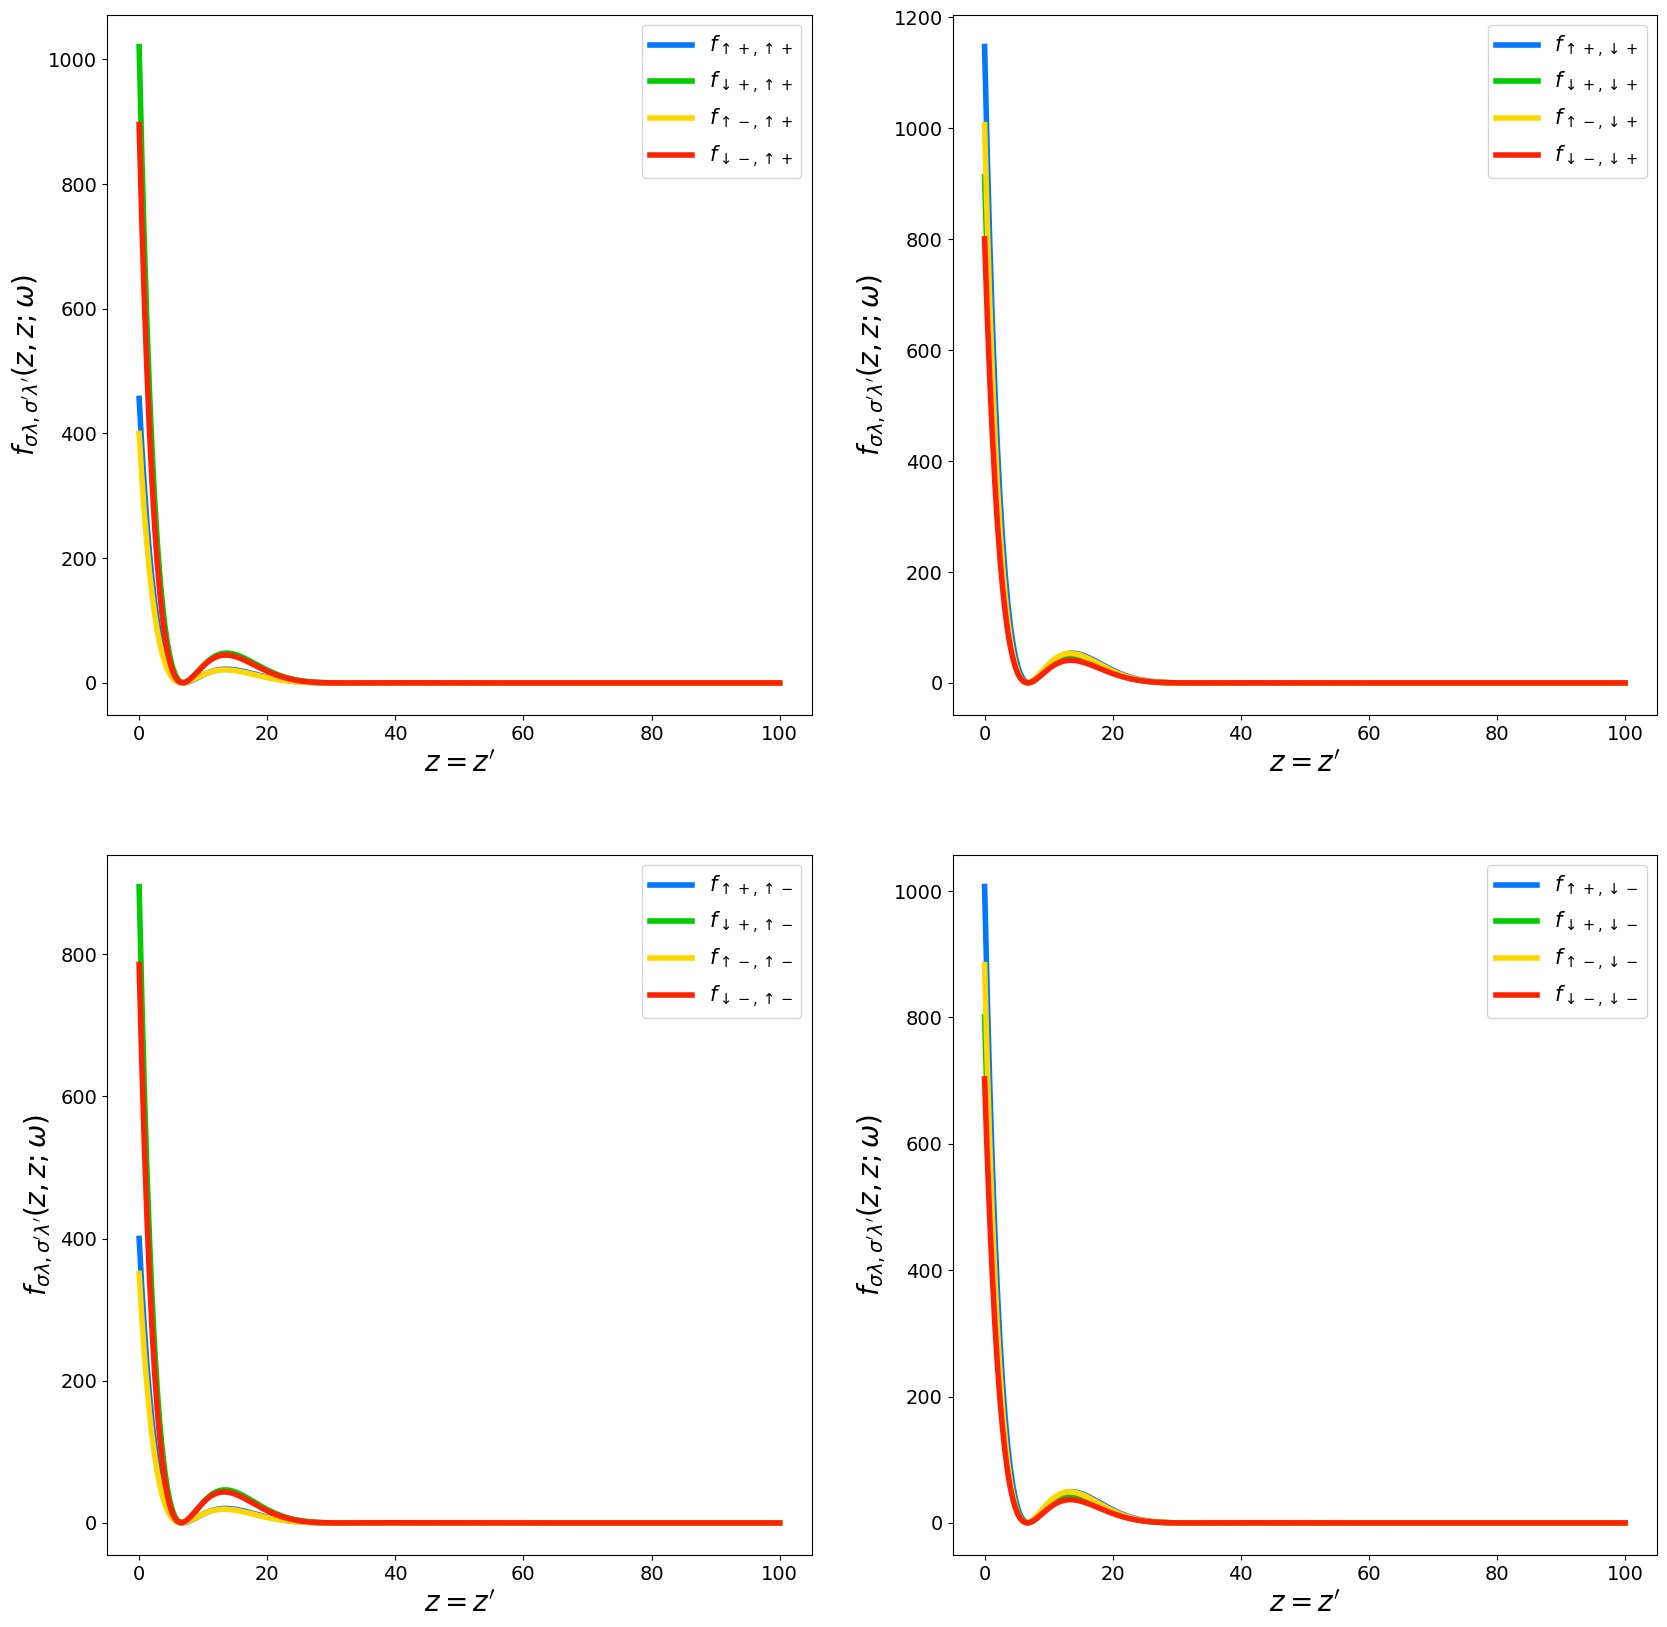

In [3]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, abs(F2[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15)

## Frequency Dependence

In [32]:
# parameters
d = 100.; mu = 0.010; Delta = 0.005; L = 0.050; z0=0
# frequency
frequency = np.linspace(-0.0049, 0.0049, 150)
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=5., Z=5., z0=0., kx=0.005, ky=-0.005, L=L, mu=mu, Delta=Delta, omega=f, Gamma=Gamma) for f in frequency])
print(F2.shape)

(150, 4, 4)


#### <font color='green'> **Absolute Value** </font> 

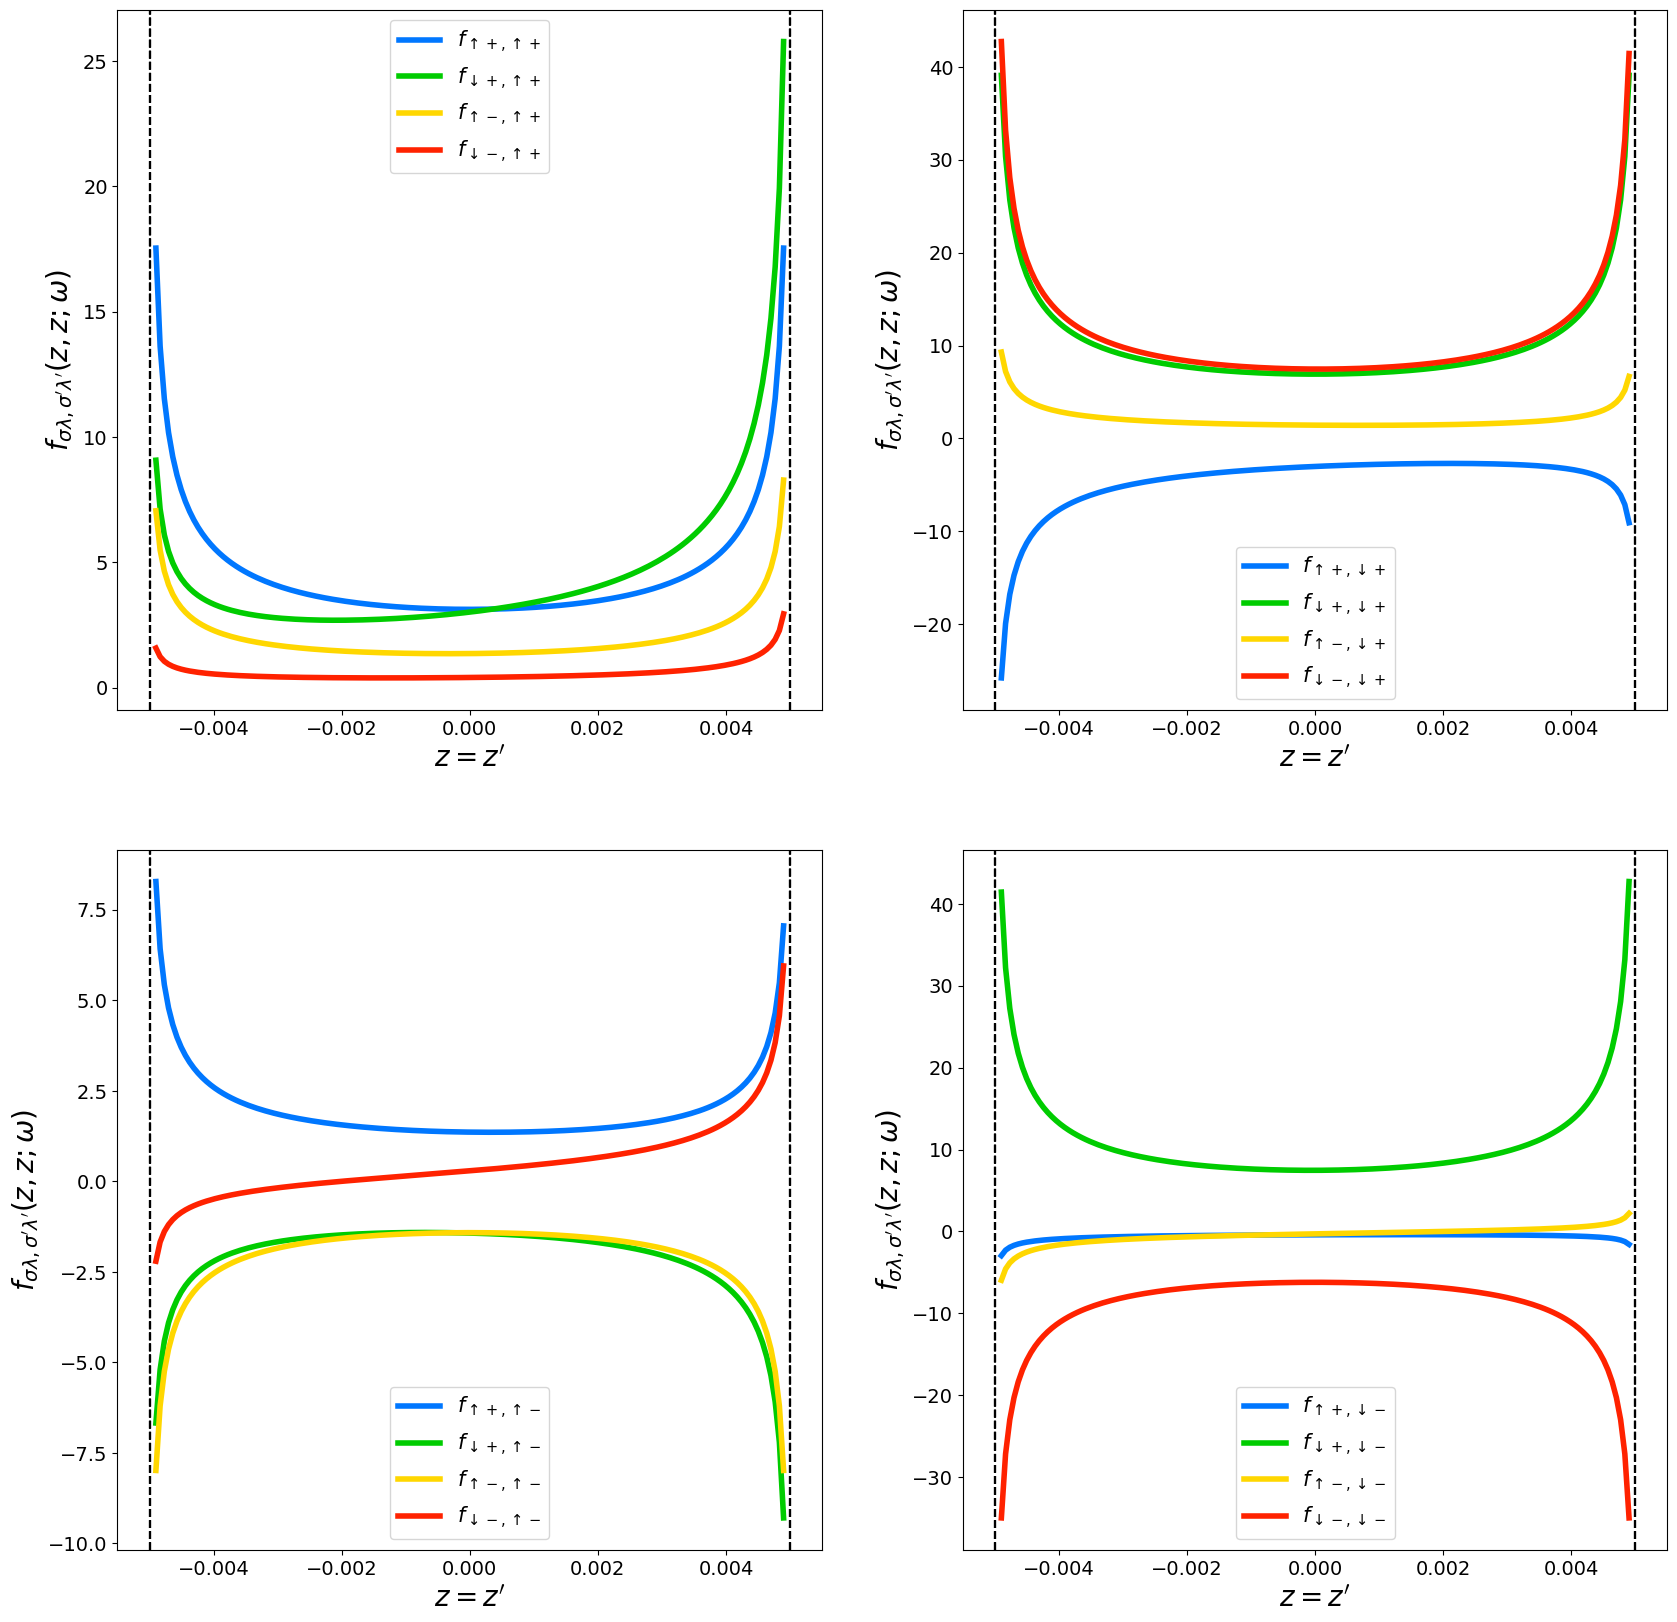

In [34]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        axs[iPic][jPic].axvline(x=Delta, c='black', lw=1.5, ls='--'); axs[iPic][jPic].axvline(x=-Delta, c='black', lw=1.5, ls='--')

        # plot second order correction F2
        axs[iPic][jPic].plot(frequency, F2[:,irow,icol].imag, c=colors[irow], lw=4, label=Flabels[irow][icol] )
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

## <font color='black'> Wigner Transform </font> 

We switch to relative coordinates 
$$
    Z = \frac12 (z+z') \,, 
    \qquad
    \overline{z} = z-z' \,,
$$
in order to obtain the pairing as a function of center-of-mass $Z$ and relative position $\overline{z}$ of the two electrons forming a Cooper pair.
The opposite transformation from relative coordinates to separate coordinates $z$ and $z'$ is given by
$$
    z = Z+\frac12 \overline{z} \,, 
    \qquad
    z' = Z-\frac12 \overline{z} \,.
$$
Fixed the center of mass coordinate $Z$ of the Cooper pair, we can perform a *discrete Fourier transform* over the relative coordinate as
$$
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z, k) = \sum_{\overline{z}} e^{-i k \overline{z}} 
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z+\frac12 \overline{z}, Z-\frac12 \overline{z}) \,.
$$

### **Relative Coordinates**

In [6]:
# Evaluate discrete Fourier transform in relative coordinates
# kZ0=center of mass of Cooper pair, Nzrel=number of discrete lattice points for z relative
def DiscreteFT(d, Z0, kx, ky, L, mu, Delta, omega, Gamma, Nzrel=200, z0=0, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1., t=1.):
    

    # boundaries for |z1-z2|
    max_zrel = max(d, d-Z0)
    # discrete lattice for relative coordinates
    zrelative = np.linspace(-max_zrel, max_zrel, Nzrel)    
    
    # lattice spacing for relative coordinates
    a = abs( zrelative[1]-zrelative[2] ); N = len(zrelative)

    # F2 in relative coordinates
    F2_rc = []; 
    # loop over relative coordinate z
    for z in zrelative:
    
        # separate coordinates z1, z2
        z1 = Z0 + 1/2*z; z2 = Z0 - 1/2*z
    
        # evaluate F2 as function of relative position z for fixed center of mass Z
        F2_rc.append( FMTI2_NeumannBC(d=d, z=z1, Z=z2, z0=z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar) )
    
    # array for F2 in relative coordinates (real space)
    F2_rc = np.array(F2_rc)

    # get array of k values
    k = 2*np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=a))
    # evaluate the Wigner transform
    F2_k = np.fft.fftshift(np.fft.fft(F2_rc))
    
    return k, F2_k


# center of mass
Z0 = 1
# lattice for relative distances
zrelative = np.linspace(-10,10,200)
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
kx = 0.00; ky = 0.00; mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.; z0=0
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# compute discrete FT
k, F2_k = DiscreteFT(d=d, Z0=Z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma)
print(k.shape, F2_k.shape)

(200,) (200, 4, 4)


#### <font color='green'> **Wigner Transform** </font> 

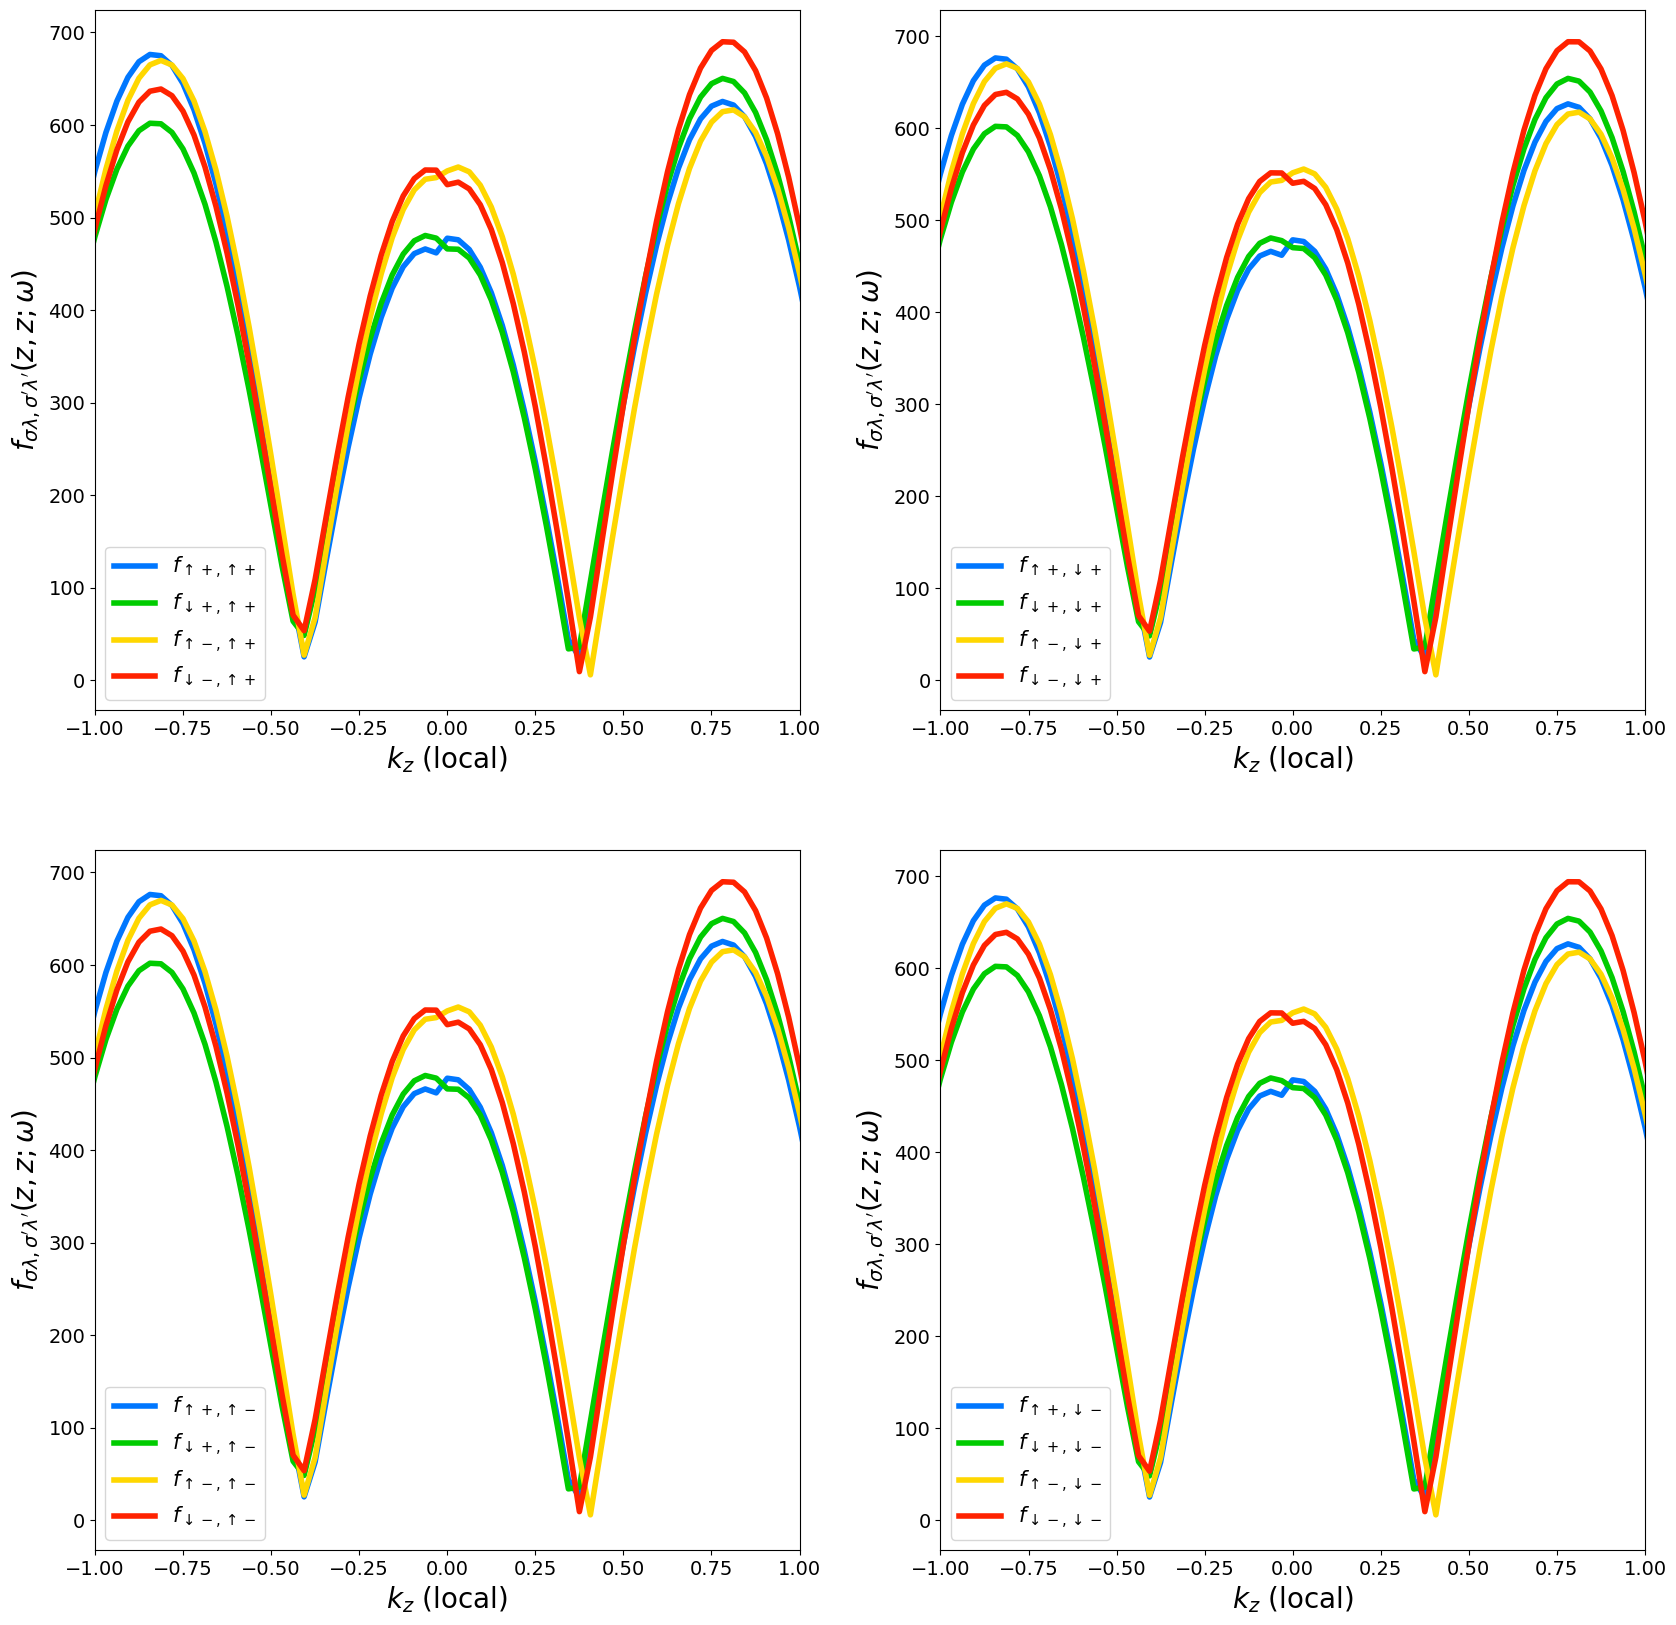

In [7]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(k, abs(F2_k[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )
    
    axs[iPic][jPic].set_xlim(-1,1) 
    
    axs[iPic][jPic].set_xlabel("$k_z$ (local)", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### **Momentum Inversion**

To study the symmetry of the pairing, we just need to understand how it behaves under inversion of the momentum, i.e. when transforming $(k_x,k_y, k_z) \rightarrow (-k_x,-k_y, -k_z)$.
In a central potential, the angular part of a wavefunction is described by spherical harmonics
$$
    \psi(\mathbf{r}) = R_l(r) Y_l^m(\theta, \phi) \,.
$$
Each $l$ corresponds to a specific spatial symmetry:
 
- $l=0 \;$  $s$-wave, even and fully isotropic;
- $l=1 \;$  $p$-wave, odd with a dipole-like structure;
- $l=0 \;$  $d$-wave, even with quadrupole-like lobes.


Inversion (also known as parity) transforms real space position as $\mathbf{r} \rightarrow -\mathbf{r}$ and momentum as $\mathbf{k} \rightarrow -\mathbf{k}$.
Spherical harmonics satisfy
$$
    Y_l^m(- \hat{r}) = (-1)^l Y_l^m(\hat{r}) \,,
$$
meaning that the eigenstates of angular momentum are also eigenstates of parity with parity $(-1)^l$. 
This means that if $\psi(\mathbf{r})$ is made from even angular momenta $l$ is even under inversion $\psi(\mathbf{r})=\psi(\mathbf{-r})$, while is odd if it is made from odd angular momenta $\psi(\mathbf{r})=-\psi(\mathbf{-r})$.
The wavefunction remains even or odd even in momentum space, meaning that the parity of the real-space waveunction can be deduced from the behaviour under inversion transformation $\mathbf{k} \rightarrow -\mathbf{k}$.

- If $\psi(\mathbf{r})$ has even orbital angular momentum $l=0,2,\dots$:
  $$
      \psi(\mathbf{r})=\psi(\mathbf{-r}) \,,
      \qquad
      \psi(\mathbf{k})=\psi(\mathbf{-k}) \,;
  $$
- If $\psi(\mathbf{r})$ has odd orbital angular momentum $l=1,3,\dots$:
  $$
      \psi(\mathbf{r})=-\psi(\mathbf{-r}) \,,
      \qquad
      \psi(\mathbf{k})=-\psi(\mathbf{-k}) \,.
  $$

In [35]:
from MTI_Pairing_Symmetries import Change_Basis, Block_Reverse


# function which evaluates the pairing and its inverse transformation
# the inverse can be in momentum, energy, spin, or parity (lambda)
def Symmetry_Pairing(space, d, Z0, kx, ky, L, mu, Delta, omega, Gamma, Nzrel = 200, z0 = 0, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1., t=1.):

    # compute Wigner transform for kx,ky
    k, F = DiscreteFT(d=d, Z0=Z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, Nzrel=Nzrel, z0=z0, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar, t=t)

    # get the symmetric function
    match space:
    
        # reverse all momenta (kx,ky,kz) --> (-kx,-ky,-kz)
        case 'momentum':
            
            # compute Wigner transform for -kx,-ky
            k_inv, F_inv = DiscreteFT(d=d, Z0=Z0, kx=-kx, ky=-ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma)
            # reverse the local kz momentum
            F_inv = F_inv[::-1, :, :] 
            
        # reverse energy w --> -w
        case 'energy':
                        
            # compute Wigner transform for -omega
            k_inv, F_inv = DiscreteFT(d=d, Z0=Z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=-omega, Gamma=Gamma)

            
        # reverse spin (sigma,sigma') --> (sigma',sigma) 
        case 'spin':

            # get pairing in spin basis
            F_spin = np.array([Change_Basis(f) for f in F])
            # reverse spin and go back to parity basis
            F_inv = np.array([Change_Basis(Block_Reverse(f)) for f in F_spin])
            
            
        # reverse spin (lambda,lambda') --> (lambda',lambda) 
        case 'parity':

            # reverse parity
            F_inv = np.array([Block_Reverse(f) for f in F])
    

        case _:
            F_inv = 0

    return F, F_inv



# function which evaluates the even/odd ratios for the given pairing
def Even_Odd(F, F_inv):

    # define even part with momentum reversal 
    F_even = 0.5 * (F + F_inv)
    # define odd part with momentum reversal 
    F_odd  = 0.5 * (F - F_inv)
    # normalization
    norm = np.abs(F_even) + np.abs(F_odd)
    
    # ratio of even pairing 
    even = np.divide(np.abs(F_even), norm)
    # ratio of odd pairing 
    odd = np.divide(np.abs(F_odd), norm)

    return even, odd

### Momentum Inversion

We study the symmetry of the pairing components reversing the momentum $(k_x,k_y,k_z) \rightarrow (-k_x,-k_y,-k_z)$ and as a function of magnetization.

In [56]:
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
Z0 = 0; kx = 0.01; ky = 0.01; mu = 0.010; Delta = 0.005; ene = 0.001
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])


# arrays for ratios
r_even = []; r_odd = []
# magnetization
Zeeman = np.linspace(0,0.050,20)

for L in Zeeman:

    print(L)
    # inverse selected space
    F, F_inv = Symmetry_Pairing(space='momentum', d=d, Z0=Z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=ene, Gamma=Gamma)
    
    # change basis to spin
    F = np.array([Change_Basis(f) for f in F])
    F_inv = np.array([Change_Basis(f) for f in F_inv])
    
    # get even odd components
    even, odd = Even_Odd(F, F_inv)

    r_even.append(even[10]); r_odd.append(odd[10])

    '''
    idx = 100
    
    print
    print(even[idx])
    print()
    print(odd[idx])
    print()
    print((even+odd)[idx])
    '''

r_even = np.array(r_even); r_odd = np.array(r_odd) 

0.0
0.002631578947368421
0.005263157894736842
0.007894736842105263
0.010526315789473684
0.013157894736842105
0.015789473684210527
0.018421052631578946
0.021052631578947368
0.02368421052631579
0.02631578947368421
0.02894736842105263
0.031578947368421054
0.034210526315789476
0.03684210526315789
0.039473684210526314
0.042105263157894736
0.04473684210526316
0.04736842105263158
0.05


#### <font color='green'> **Zeeman Plot** </font> 

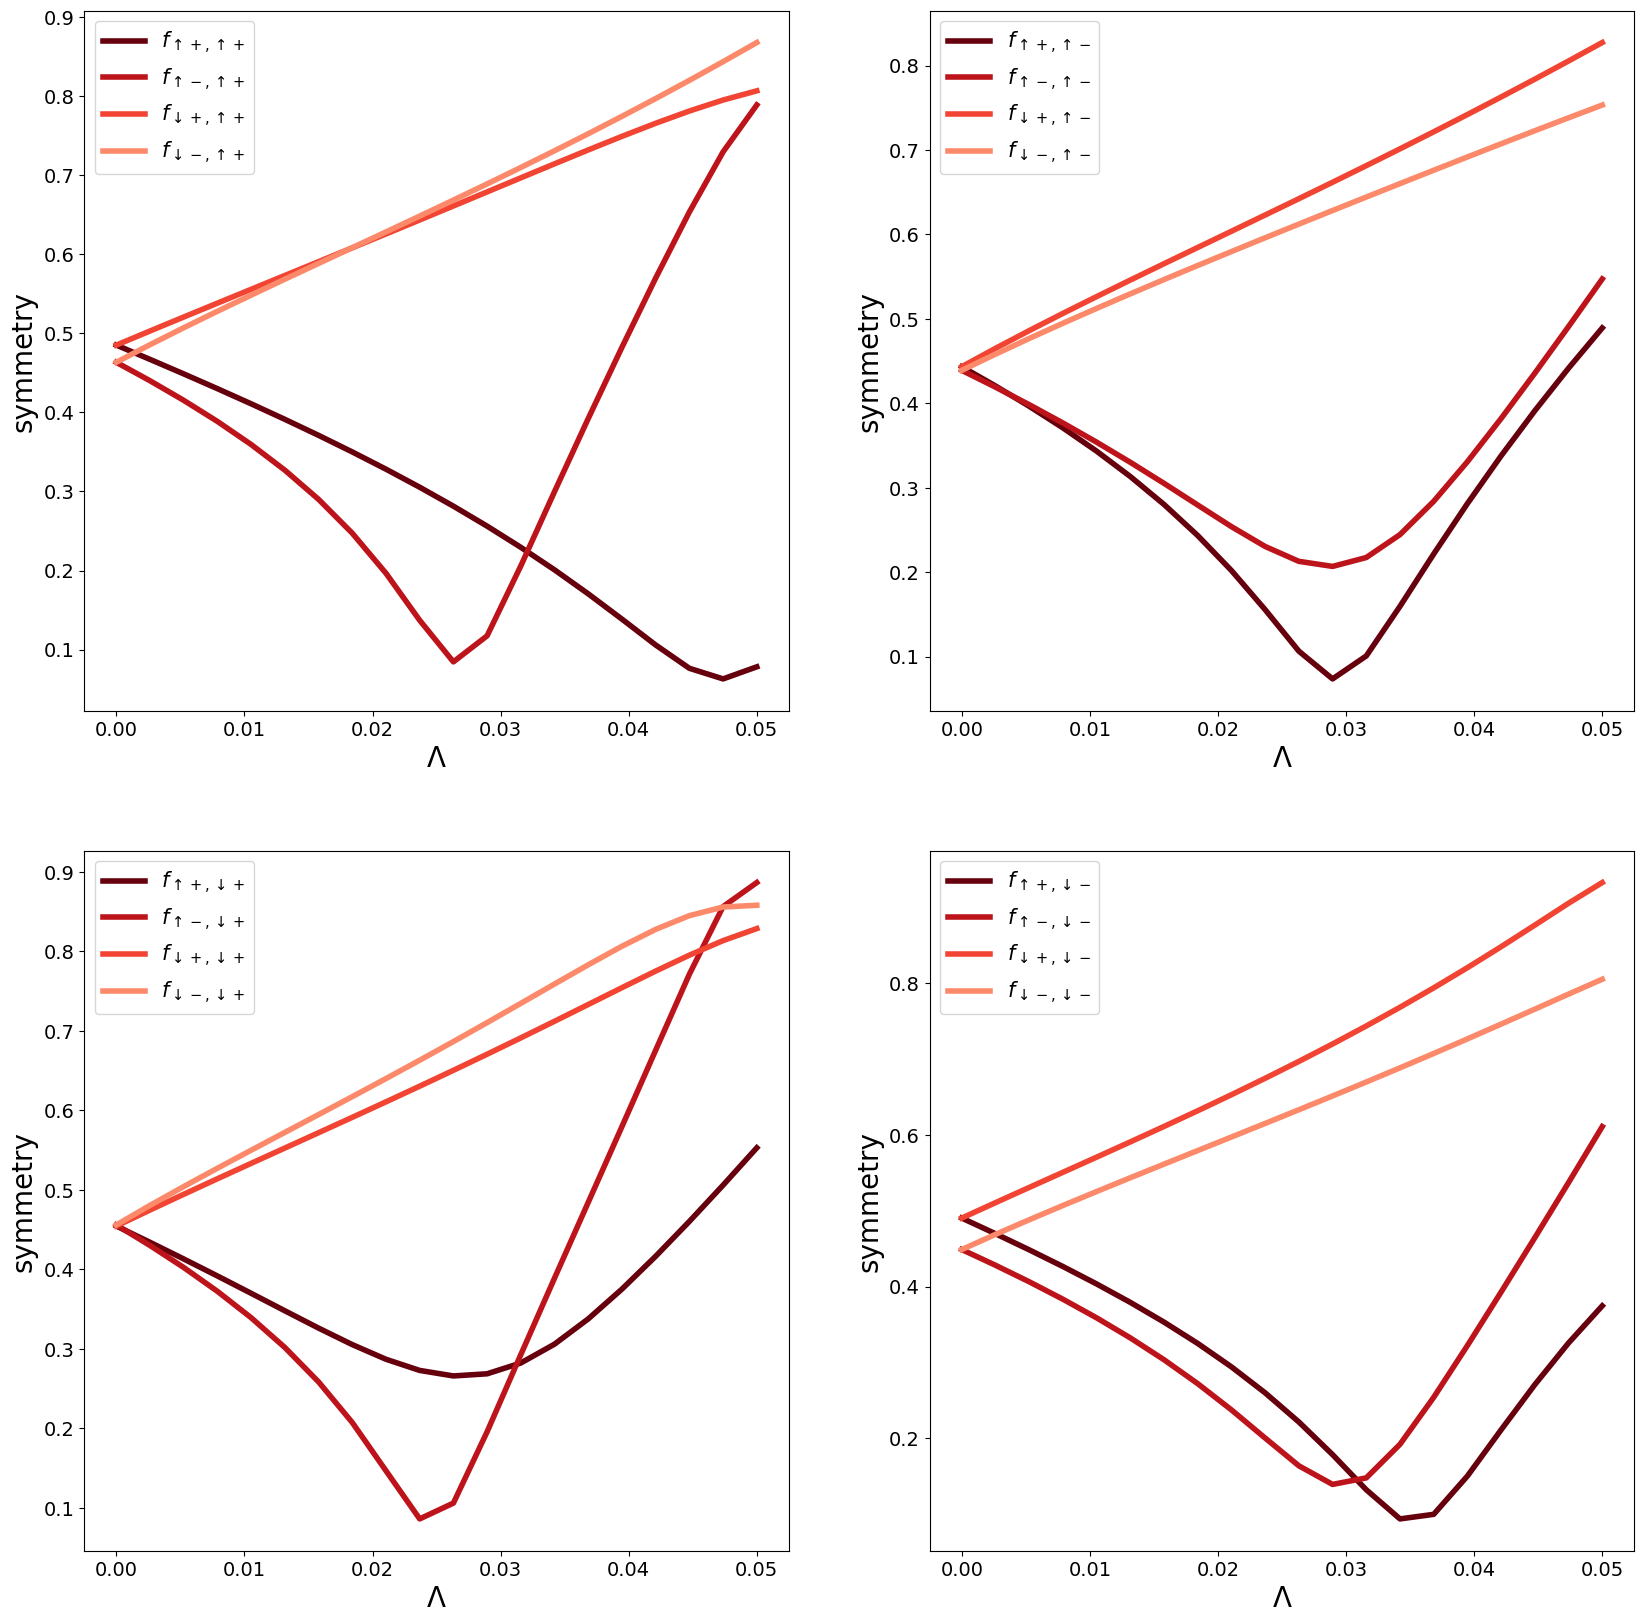

In [61]:
# colors
colors = colors_abs
ceven = plt.get_cmap('Blues_r', 6)
codd = plt.get_cmap('Reds_r', 6)
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

labels = Change_Basis(Flabels)


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        #axs[iPic][jPic].plot(Zeeman, r_even[:,irow,icol], c=ceven(irow), lw=4, label=labels[irow][icol] )
        axs[iPic][jPic].plot(Zeeman, r_odd[:,irow,icol], c=codd(irow), lw=4, label=labels[irow][icol] )
        
    axs[iPic][jPic].set_xlabel("$\Lambda$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("symmetry", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Parity Sketch** </font> 

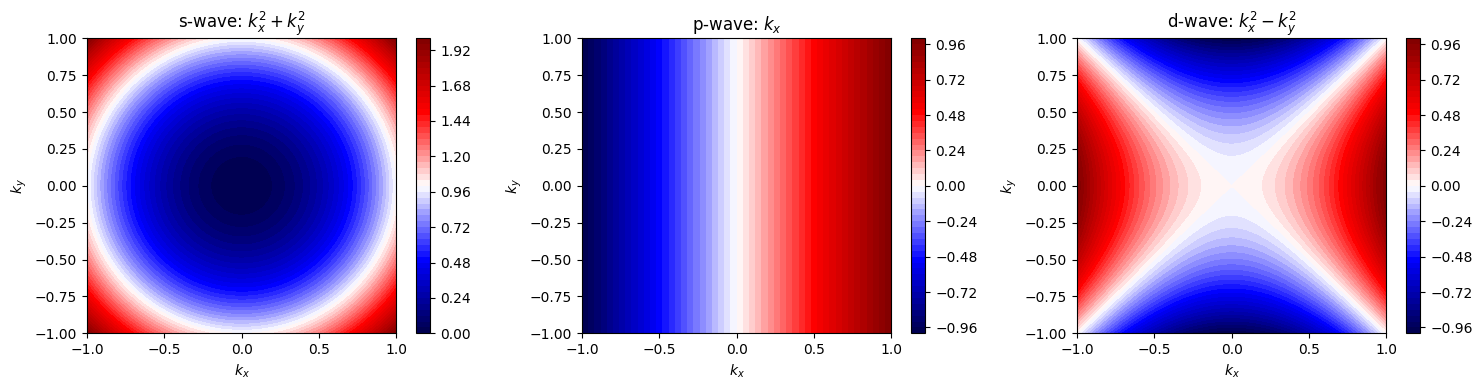

In [22]:
import numpy as np
import matplotlib.pyplot as plt

kx = np.linspace(-1, 1, 100)
ky = np.linspace(-1, 1, 100)
kx, ky = np.meshgrid(kx, ky)

f_s = kx**2 + ky**2
f_p = kx
f_d = kx**2 - ky**2

fig, axes = plt.subplots(1, 3, figsize=(15,4))

titles = ['s-wave: $k_x^2 + k_y^2$', 
          'p-wave: $k_x$', 
          'd-wave: $k_x^2 - k_y^2$']

for ax, f, title in zip(axes, [f_s, f_p, f_d], titles):
    c = ax.contourf(kx, ky, f, cmap='seismic', levels=50)
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
    ax.set_title(title)
    fig.colorbar(c, ax=ax)

plt.tight_layout()
plt.show()